In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
WMT_Stock = pd.read_csv('walmart_stock.csv')

In [6]:
# DROP UNWANTED COLUMNS
WMT_Stock = WMT_Stock.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

In [9]:
WMT_Stock['Date'] = pd.to_datetime(WMT_Stock['Date'])

In [11]:
WMT_Stock.set_index('Date', inplace = True)

In [12]:
WMT_Stock.head()

,Close
Date,
2012-01-03,60.330002
2012-01-04,59.709999
2012-01-05,59.419998
2012-01-06,59.000000
2012-01-09,59.180000


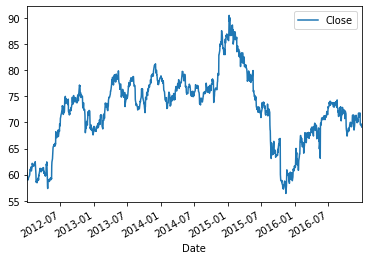

In [13]:
WMT_Stock.plot()

In [14]:
WMT_Stock_weekly = WMT_Stock['2012-01-03':'2016-12-23'].resample('W').sum()

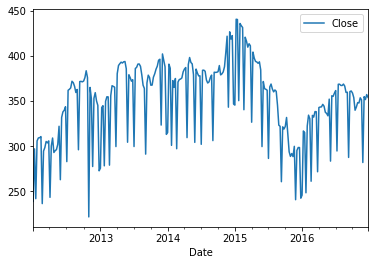

In [15]:
WMT_Stock_weekly.plot()

In [17]:
WMT_Stock.tail()

,Close
Date,
2016-12-23,69.540001
2016-12-27,69.699997
2016-12-28,69.309998
2016-12-29,69.260002
2016-12-30,69.120003


In [18]:
WMT_Stock_Monthly = WMT_Stock['2012-01-03':'2016-12-23'].resample('M').sum()

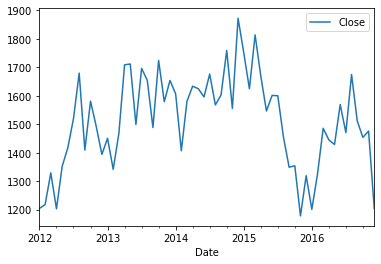

In [27]:
WMT_Stock_Monthly.plot()

#### Simple Exponential Smoothing (SES)

SES is a good choice for forecasting data with no clear trend or seasonal pattern. Forecasts are calculated using weighted averages, which means the largest weights are associated with most recent observations, while the smallest weights are associated with the oldest observations:

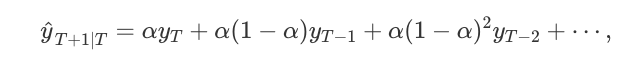

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#### SIMPLE EXPONENTIAL SMOOTHING

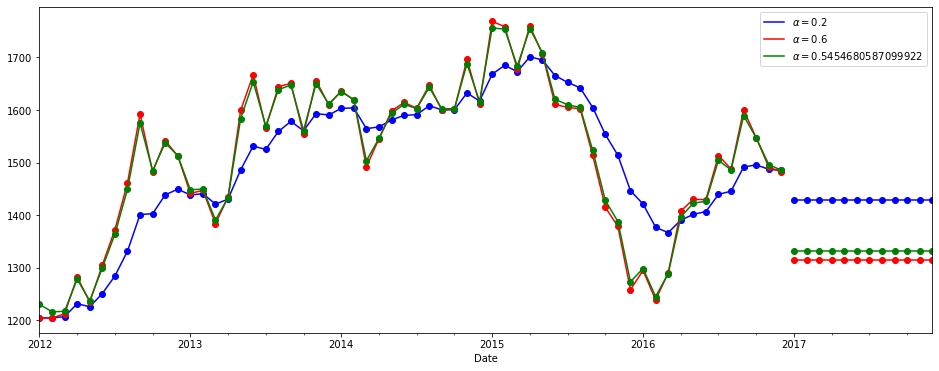

In [33]:
# Simple Exponential Smoothing
fit1_SES = SimpleExpSmoothing(WMT_Stock_Monthly).fit(smoothing_level = 0.2, optimized = False)
fcast1_SES = fit1_SES.forecast(12).rename(r'$\alpha = 0.2$')
# plot
fcast1_SES.plot(marker = 'o', color = 'blue', legend = True, figsize = (16, 6))
fit1_SES.fittedvalues.plot(marker = 'o', color = 'blue')
# ------------------------------------------------
fit2_SES = SimpleExpSmoothing(WMT_Stock_Monthly).fit(smoothing_level = 0.6, optimized = False)
fcast2_SES = fit2_SES.forecast(12).rename(r'$\alpha = 0.6$')
# plot
fcast2_SES.plot(marker='o', color='red', legend=True, figsize = (16, 6))
fit2_SES.fittedvalues.plot(marker='o', color='red')
# --------------------------------------------------
fit3_SES = SimpleExpSmoothing(WMT_Stock_Monthly).fit()
fcast3_SES = fit3_SES.forecast(12).rename(r'$\alpha = %s$'%fit3.model.params['smoothing_level'])
# plot
fcast3_SES.plot(marker = 'o', color = 'green', legend = True, figsize = (16, 6))
fit3_SES.fittedvalues.plot(marker = 'o', color = 'green')

plt.show()

#### Holt’s Method

Holt extended simple exponential smoothing (solution to data with no clear trend or seasonality) to allow the forecasting of data with trends in 1957. Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend):

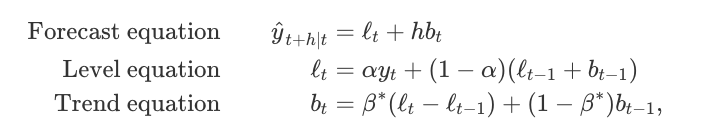

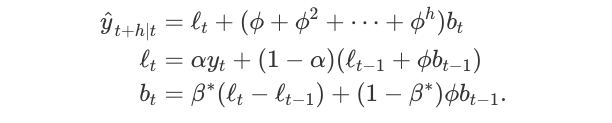

#### HOLT MODEL

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


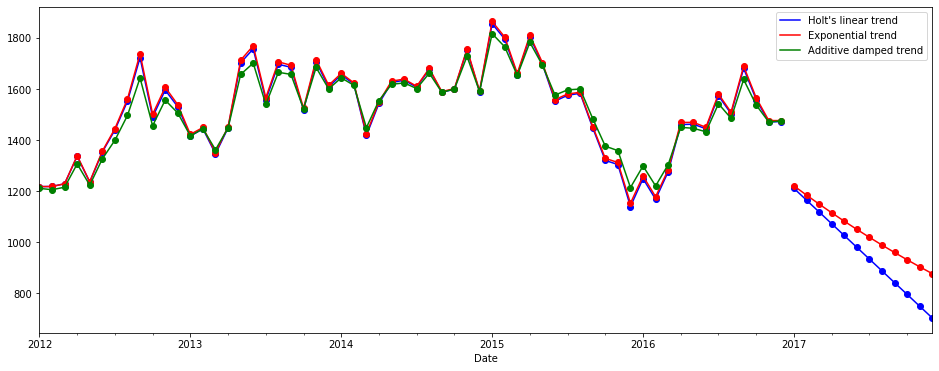

In [35]:
fit1_Holt = Holt(WMT_Stock_Monthly).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)
fcast1_Holt = fit1_Holt.forecast(12).rename("Holt's linear trend")
# Plot
fcast1_Holt.plot(color = 'blue', marker = "o", legend = True, figsize = (16, 6))
fit1_Holt.fittedvalues.plot(marker = "o", color = 'blue')
# --------------------------------------------------------------
fit2_Holt = Holt(WMT_Stock_Monthly, exponential = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)
fcast2_Holt = fit2_Holt.forecast(12).rename("Exponential trend")
# Plot
fcast2_Holt.plot(color = 'red', marker = "o", legend = True, figsize = (16, 6))
fit2_Holt.fittedvalues.plot(marker = "o", color = 'red')
# --------------------------------------------------------------
fit3_Holt = Holt(WMT_Stock_Monthly, damped = True).fit(smoothing_level = 0.8, smoothing_slope = 0.2)
fcast3_Holt = fit3_Holt.forecast(12).rename("Additive damped trend")
# Plot
fcast3_Holt.plot(color = 'green', marker = "o", legend = True, figsize = (16, 6))
fit3_Holt.fittedvalues.plot(marker = "o", color = 'green')

plt.show()

#### Holt-Winters’ Method

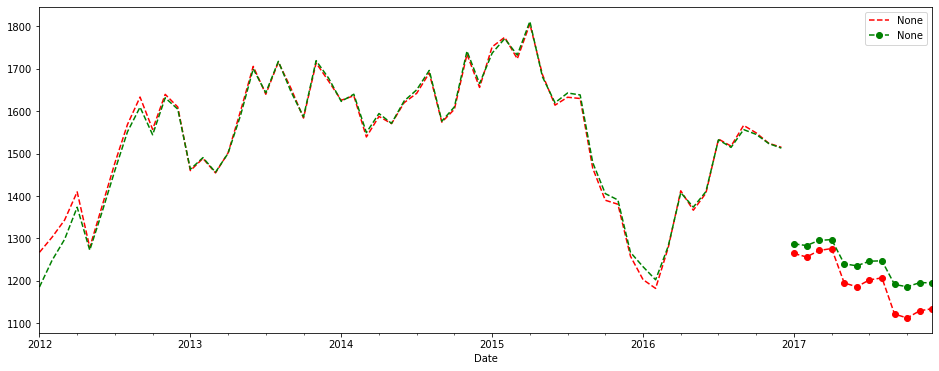

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [37]:
fit1_HW = ExponentialSmoothing(WMT_Stock_Monthly, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2_HW = ExponentialSmoothing(WMT_Stock_Monthly, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3_HW = ExponentialSmoothing(WMT_Stock_Monthly, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4_HW = ExponentialSmoothing(WMT_Stock_Monthly, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1_HW.fittedvalues.plot(style='--', color='red')
fit2_HW.fittedvalues.plot(style='--', color='green')

fit1_HW.forecast(12).plot(style='--', marker='o', color='red', legend=True, figsize = (16, 6))
fit2_HW.forecast(12).plot(style='--', marker='o', color='green', legend=True, figsize = (16, 6))

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

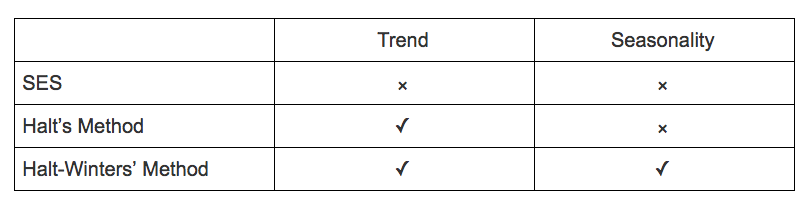

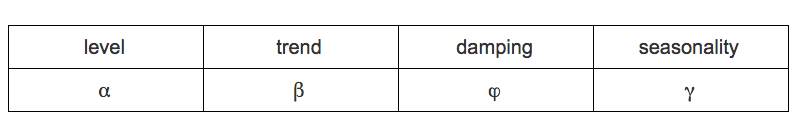